In [1]:
import numpy as np
import pandas as pd
from scipy import io, stats
import os
import random
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
import time as time
import igraph as igraph
import sys

print("igraph version:", igraph.__version__)

# # Import our own adaptive-confidence bounded-confidence module
# import sys
# sys.path.append('..') #look one directory above
# import AdaptiveConfidenceBCM

minor_clusters_percent = 1

igraph version: 0.9.7


In [5]:
## Change parameters here ---------------------------------------------------------------
# Name of experiment folder

graph_type = "complete" #If we are generating a synthetic network with n nodes
n = 1000

#Edge probability for ER graphs
ps = [1] #by default there are no edge probabilities, we put a single value as placeholder
if graph_type == "erdos-renyi":
    ps = [0.1, 0.5] #edge probability for ER graph
    
#SBM edge probabilities
if graph_type == "SBM":
    p_aa, p_bb = 1, 1
    p_ab = 0.1
    pref_matrix = [[p_aa, p_ab], [p_ab, p_bb]]

#Confidence-increase parameter
# gammas = [0.05, 0.01, 0.005, 0.001]
gamma = 0.05

#Confidence-decrease parameter
# deltas = [0.5, 0.9, 0.95, 0.99, 1.0]
delta = 0.5

# if n == 1000 and graph_type == "complete":
#     deltas = [0.01, 0.1, 0.5, 0.9, 0.95, 0.99, 1.0] #Confidence-decrease parameter
#     gammas = [0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1] #Confidence-increase parameter

#Initial confidence bound
# cs = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.3, 0.4, 0.5]
c = 0.15

#specify opinions sets
opinion_sets = list(range(10))

#Specify which graph to look at if using a random-graph model
graph = 0

folder_name_dict = {"complete": "Complete", "erdos-renyi": "Erdos-Renyi", "SBM":"SBM"}
random_graph_folders = ["SBM", "Erdos-Renyi"] #The names of the folders with random-graph models

folder_name = folder_name_dict[graph_type]
experiment = folder_name + '/' + graph_type + str(n)

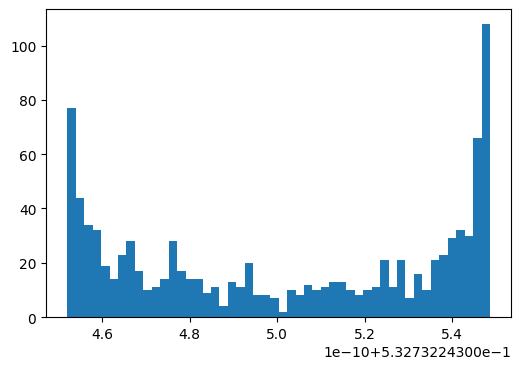

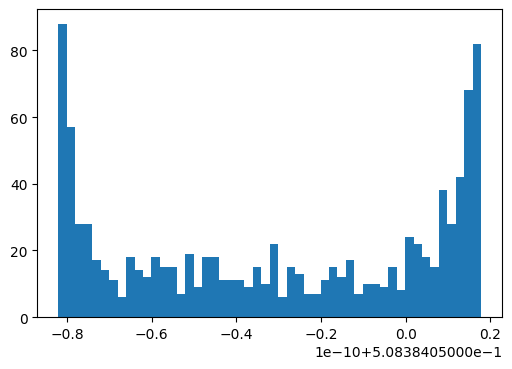

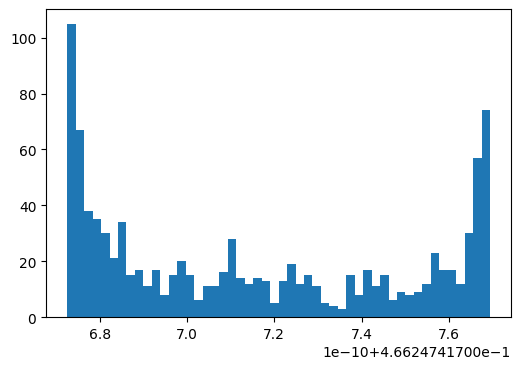

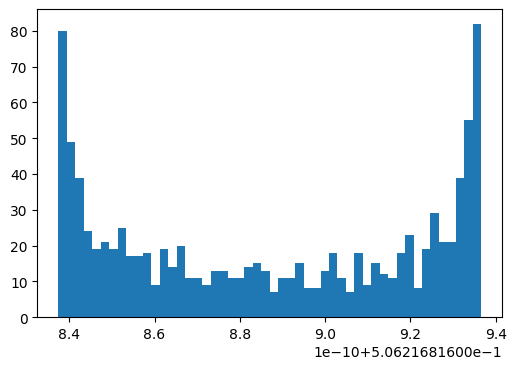

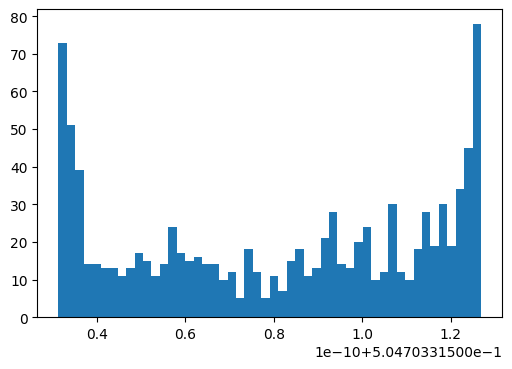

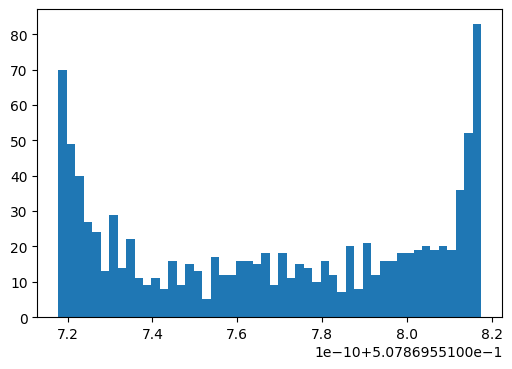

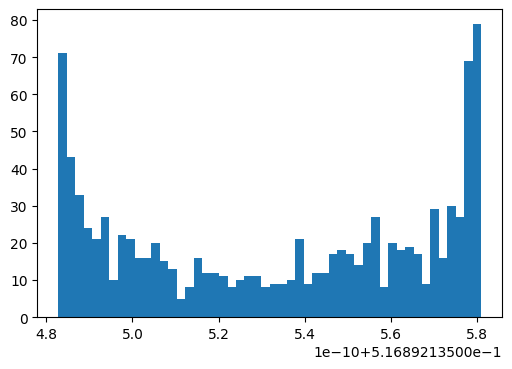

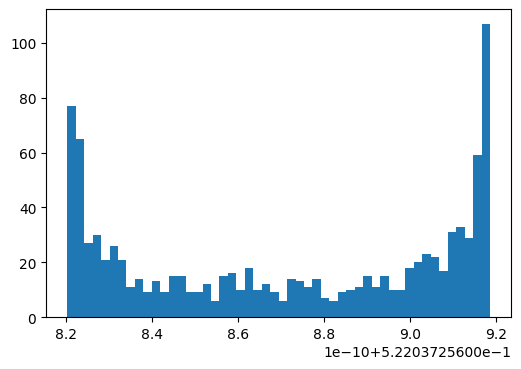

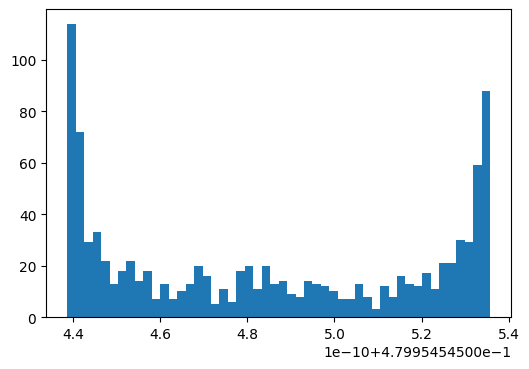

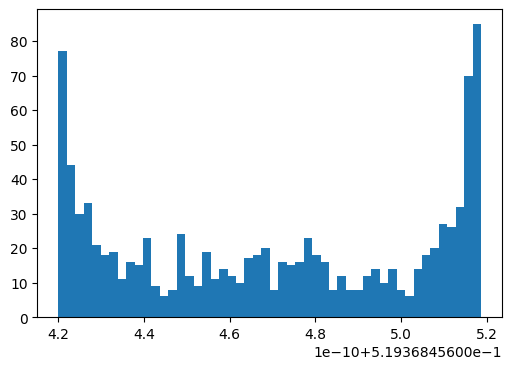

In [7]:
for opinion_set in opinion_sets:

    if graph_type == "erdos-renyi":
        matfile = (
                    f"{experiment}/matfiles/p{p}"
                    f"/graph{graph_number}/delta{delta}-gamma{gamma}"
                    f"/p{p}-graph{graph_number}--delta{delta}-gamma{gamma}"
                    f"--c{c}-op{opinion_set}.mat"
                   )
    elif graph_type == "SBM":
        matfile = (
                    f"{experiment}/matfiles/p_aa{p_aa}-p_bb{p_bb}-p_ab{p_ab}"
                    f"/graph{graph_number}/delta{delta}-gamma{gamma}"
                    f"/graph{graph_number}--delta{delta}-gamma{gamma}"
                    f"--c{c}-op{opinion_set}.mat"
                  )
    else:
         matfile = (
                     f"{experiment}/matfiles/delta{delta}-gamma{gamma}"
                     f"/delta{delta}-gamma{gamma}--c{c}-op{opinion_set}.mat"
                   )

    try:
        results = io.loadmat(matfile)
        final_opinions = results['final_opinions'][0]
        
        fig, ax = plt.subplots(figsize = (6,4))
        ax.hist(final_opinions, bins = 50)
        
    except:
        print("Unable to read:", matfile)